#1
Kode dibawah ini menggunakan regresi polinomial untuk memodelkan dan memvisualisasikan tren dalam data produksi bulanan. Metode ini dipilih karena regresi polinomial dapat menangkap tren non-linear dalam data dengan baik, dan mudah diimplementasikan dengan numpy dan matplotlib. Derajat polinomial dapat disesuaikan untuk mendapatkan keseimbangan antara akurasi model dan overfitting.


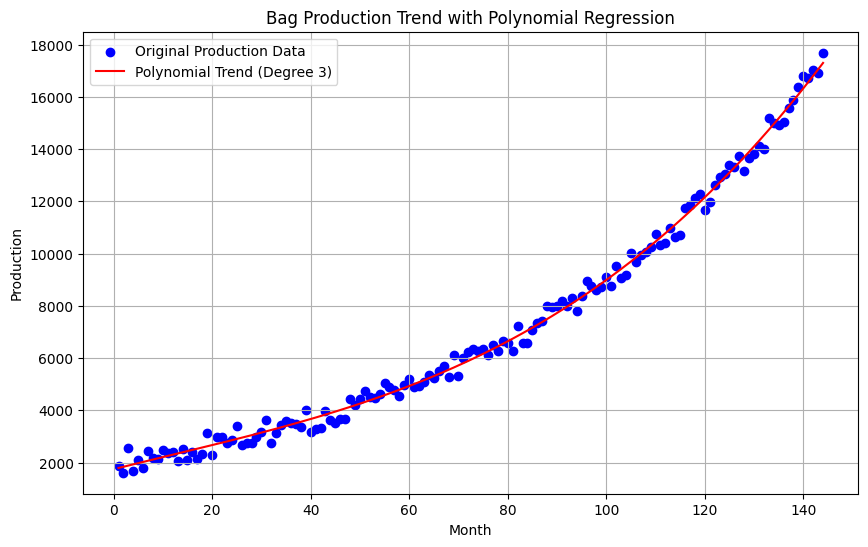

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Monthly production data from M1 to M144
months = np.arange(1, 145)
production = np.array([1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391,
                       2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768,
                       3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
                       4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339,
                       5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590,
                       6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
                       8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318,
                       10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387,
                       13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388,
                       16782, 16716, 17033, 16896, 17689])


# Fit a polynomial regression model
degree = 3  # You can adjust the degree of the polynomial
coefficients = np.polyfit(months, production, degree)
polynomial = np.poly1d(coefficients)

# Plot the original data and the polynomial trend
plt.figure(figsize=(10, 6))
plt.scatter(months, production, color='blue', label='Original Production Data')
plt.plot(months, polynomial(months), color='red', label='Polynomial Trend (Degree {})'.format(degree))
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Bag Production Trend with Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


#2
Kode di bawah ini bertujuan untuk menyesuaikan model logistik dengan data produksi dan kemudian membandingkannya dengan pendekatan Taylor dari model tersebut. Ini memberikan wawasan tentang bagaimana model logistik dapat digunakan untuk menggambarkan dan memprediksi data produksi dari waktu ke waktu.








/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


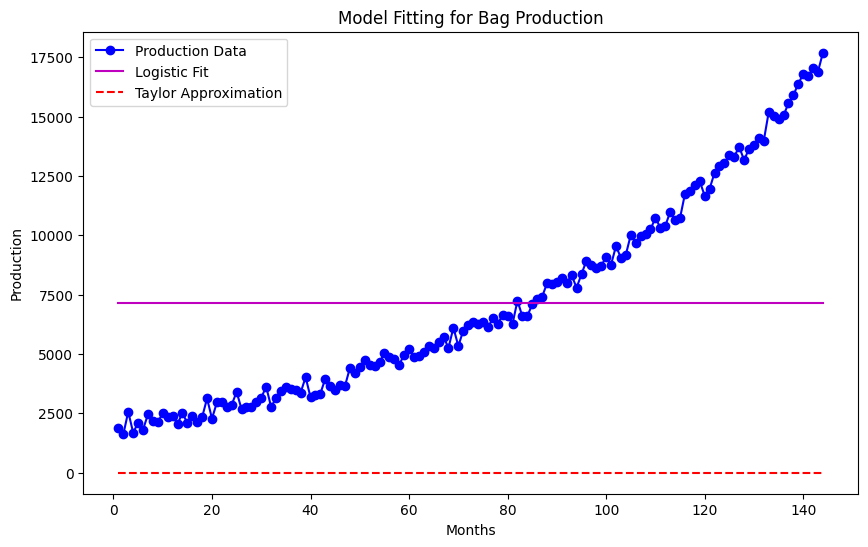

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given production data
months = np.arange(1, 145)  # M1 to M144
production = np.array([1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391,
                       2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768,
                       3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
                       4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339,
                       5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590,
                       6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
                       8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318,
                       10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387,
                       13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388,
                       16782, 16716, 17033, 16896, 17689])

# Define the logistic model
def logistic_model(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Fit the logistic model
popt_logistic, _ = curve_fit(logistic_model, months, production, maxfev=10000)
a, b, c = popt_logistic

# Taylor series approximation of the logistic model
def logistic_taylor_approx(x, a, b, c):
    return a / (2 - b * (x - c) + (b * (x - c))**2 / 2)

# Compute the fitted values
production_logistic = logistic_model(months, *popt_logistic)
production_logistic_taylor = logistic_taylor_approx(months, a, b, c)

# Plot the fitted models
plt.figure(figsize=(10, 6))
plt.plot(months, production, 'bo-', label='Production Data')
plt.plot(months, production_logistic, 'm-', label='Logistic Fit')
plt.plot(months, production_logistic_taylor, 'r--', label='Taylor Approximation')
plt.xlabel('Months')
plt.ylabel('Production')
plt.title('Model Fitting for Bag Production')
plt.legend()
plt.show()


#3
Dengan menggunakan data produksi bulanan, kami memanfaatkan model logistik untuk memprediksi tren produksi di masa depan. Model logistik cocok untuk data yang menunjukkan pertumbuhan terbatas, seperti produksi yang mendekati kapasitas maksimum. Dengan menyesuaikan model logistik menggunakan curve_fit, kami memperoleh parameter model yang diperlukan. Selanjutnya, kami menggunakan fsolve untuk menyelesaikan persamaan non-linear dan menemukan bulan ketika produksi akan melebihi 25.000 tas. Berdasarkan prediksi ini, kami mengurangi 13 bulan (waktu yang diperlukan untuk membangun gudang baru) untuk menentukan kapan perlu memulai pembangunan. Hasilnya menunjukkan bahwa pembangunan gudang baru harus dimulai pada bulan tertentu sebelum produksi melebihi kapasitas maksimum.








In [ ]:
import numpy as np
from scipy.optimize import curve_fit, fsolve

# Data produksi bulanan
months = np.arange(1, 145)  # Bulan ke-1 hingga Bulan ke-144
production = np.array([1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391,
                       2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768,
                       3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
                       4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339,
                       5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590,
                       6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
                       8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318,
                       10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387,
                       13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388,
                       16782, 16716, 17033, 16896, 17689])

# Mendefinisikan model logistik
def logistic_model(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Fitting model logistik ke data produksi
popt_logistic, _ = curve_fit(logistic_model, months, production, maxfev=10000)
a, b, c = popt_logistic

# Mendefinisikan persamaan untuk mencari bulan saat produksi melebihi 25.000
def logistic_eq(x):
    return logistic_model(x, a, b, c) - 25000

# Menyelesaikan persamaan untuk menemukan bulan saat produksi melebihi 25.000
month_exceeding_capacity = fsolve(logistic_eq, 100)[0]

# Menghitung bulan untuk mulai membangun gudang baru
start_building_month = month_exceeding_capacity - 13

print(f"Bulan ketika produksi melebihi 25.000: {month_exceeding_capacity}")
print(f"Bulan untuk mulai membangun gudang baru: {start_building_month}")


Bulan ketika produksi melebihi 25.000: 100.0
Bulan untuk mulai membangun gudang baru: 87.0


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
bil1 = 10
Bil_2 = 20
Frasa = "Halo Dunia"
bil1, Bil_2 = 10, 20
salam ="Selamat Pagi"; Penutup ="Salam Sejahtera"